# **Recommendation System**

**Data Loading**

Import Library


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
%matplotlib inline

from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


Connect ke GDRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read Dataset

In [ ]:
riwayat_pekerjaan = pd.read_csv('/content/drive/MyDrive/mitrav3/gabung_riwayat_pekerjaan.csv')

riwayat_pekerjaan.head()

,id_job,id_mitra,user_id,job_title,job_description,job_rating,source_folder
0,255,1,37,Jasa Penyusunan Curriculum Vitae,Membantu menulis dan menyusun CV,5,mitra 1
1,199,1,40,Perbaikan TV,Memperbaiki kerusakan pada televisi,5,mitra 1
2,277,1,9,Perbaikan Alat Elektronik,Memperbaiki alat elektronik rumah,1,mitra 1
3,98,1,39,Instalasi Listrik,Pemasangan stop kontak di rumah,2,mitra 1
4,877,1,44,Pemasangan Kamar Mandi,Instalasi perangkat kamar mandi seperti wastaf...,1,mitra 1


2. Data Understanding

Melihat Infromasi Data

In [ ]:
# Deskripsi dataset
print("\nInformasi Data:")
print(riwayat_pekerjaan.info())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_job           225 non-null    int64 
 1   id_mitra         225 non-null    int64 
 2   user_id          225 non-null    int64 
 3   job_title        225 non-null    object
 4   job_description  225 non-null    object
 5   job_rating       225 non-null    int64 
 6   source_folder    225 non-null    object
dtypes: int64(4), object(3)
memory usage: 12.4+ KB
None


In [ ]:
riwayat_pekerjaan.job_rating.value_counts()

,count
job_rating,
3,53
5,52
1,46
2,38
4,36


Terlihat dari informasi data rating diatas bahwa rating memiliki maksimal 5 bintang dengan skala 0.5

In [ ]:
# Menghapus kolom 'source_folder'
riwayat_pekerjaan = riwayat_pekerjaan.drop(columns=['source_folder'])

# Menampilkan informasi DataFrame setelah kolom dihapus
print(riwayat_pekerjaan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_job           225 non-null    int64 
 1   id_mitra         225 non-null    int64 
 2   user_id          225 non-null    int64 
 3   job_title        225 non-null    object
 4   job_description  225 non-null    object
 5   job_rating       225 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 10.7+ KB
None


In [ ]:
# Melihat statistik deskriptif
print("\nStatistik Deskriptif:")
print(riwayat_pekerjaan.describe())


Statistik Deskriptif:
           id_job    id_mitra     user_id  job_rating
count  225.000000  225.000000  225.000000  225.000000
mean   545.782222    5.066667   26.302222    3.044444
std    283.941474    2.923122   14.518376    1.441656
min      8.000000    1.000000    1.000000    1.000000
25%    310.000000    3.000000   14.000000    2.000000
50%    557.000000    5.000000   26.000000    3.000000
75%    799.000000    7.000000   39.000000    4.000000
max    998.000000   10.000000   50.000000    5.000000


In [ ]:
# Total data
print(f"\nTotal data: {len(riwayat_pekerjaan)}")


Total data: 225


In [ ]:
# Cek data duplikat
print(f"\nData duplikat: {riwayat_pekerjaan.duplicated().sum()}")


Data duplikat: 0


In [ ]:
# Cek missing value
print("\nMissing Value:")
print(riwayat_pekerjaan.isnull().sum())



Missing Value:
id_job             0
id_mitra           0
user_id            0
job_title          0
job_description    0
job_rating         0
dtype: int64


In [ ]:
# Total data unik untuk setiap kolom
print("\nTotal data unik per kolom:")
for col in riwayat_pekerjaan.columns:
    print(f"{col}: {riwayat_pekerjaan[col].nunique()} unique values")


Total data unik per kolom:
id_job: 202 unique values
id_mitra: 10 unique values
user_id: 50 unique values
job_title: 94 unique values
job_description: 94 unique values
job_rating: 5 unique values


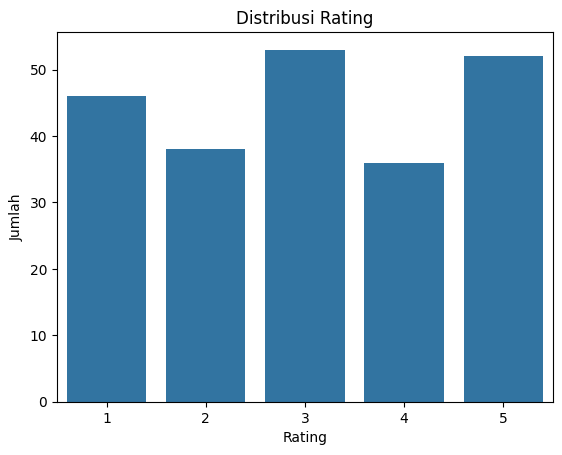

In [ ]:
# Distribusi rating
sns.countplot(data=riwayat_pekerjaan, x='job_rating')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Menghapus missing value
riwayat_pekerjaan.dropna(inplace=True)

In [ ]:
# Menghapus data duplikat
riwayat_pekerjaan.drop_duplicates(inplace=True)

In [ ]:
# Menampilkan informasi setelah pembersihan
print("\nData setelah pembersihan:")
print(riwayat_pekerjaan.info())


Data setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_job           225 non-null    int64 
 1   id_mitra         225 non-null    int64 
 2   user_id          225 non-null    int64 
 3   job_title        225 non-null    object
 4   job_description  225 non-null    object
 5   job_rating       225 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 10.7+ KB
None


Model Development

TF-IDF Vectorizer

In [ ]:
pip install nltk

In [ ]:
nltk.download('stopwords')
stop_words_indonesia = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Menggunakan TF-IDF untuk job_title dan job_description dengan stop words bahasa Indonesia
tfidf_title = TfidfVectorizer(stop_words=stop_words_indonesia)
tfidf_title.fit(riwayat_pekerjaan['job_title'])

tfidf_desc = TfidfVectorizer(stop_words=stop_words_indonesia)
tfidf_desc.fit(riwayat_pekerjaan['job_description'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


TfidfVectorizer(stop_words=['ada', 'adalah', 'adanya', 'adapun', 'agak',
                            'agaknya', 'agar', 'akan', 'akankah', 'akhir',
                            'akhiri', 'akhirnya', 'aku', 'akulah', 'amat',
                            'amatlah', 'anda', 'andalah', 'antar', 'antara',
                            'antaranya', 'apa', 'apaan', 'apabila', 'apakah',
                            'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', ...])

In [ ]:
tfidf_title.get_feature_names_out()

array(['ac', 'air', 'alat', 'angin', 'antik', 'atap', 'audio', 'bahan',
       'bangunan', 'barang', 'baterai', 'bersihkan', 'buku', 'cctv',
       'curriculum', 'dapur', 'desain', 'dinding', 'disinfektan',
       'drainase', 'elektronik', 'fi', 'furnitur', 'furniture', 'garasi',
       'gorden', 'grafis', 'gudang', 'hardware', 'instalasi', 'interior',
       'internet', 'jaringan', 'jasa', 'jemput', 'jendela', 'kamar',
       'kamera', 'kanal', 'kantor', 'karpet', 'karport', 'keamanan',
       'kebersihan', 'kendaraan', 'kerja', 'kesehatan', 'keuangan',
       'kipas', 'kolam', 'komputer', 'kulkas', 'kunci', 'lampu', 'lantai',
       'laporan', 'laundry', 'listrik', 'makanan', 'mandi', 'meja',
       'membersihkan', 'membuang', 'mengecat', 'mesin', 'mobil', 'motor',
       'nama', 'olahraga', 'orang', 'otomatisasi', 'pagar', 'pajak',
       'pakaian', 'panel', 'papan', 'pemanas', 'pemangkasan',
       'pemasangan', 'pembayaran', 'pembersihan', 'pembuangan',
       'pembuatan', 'pemeli

In [ ]:
tfidf_desc.get_feature_names_out()

array(['ac', 'acara', 'air', 'alamat', 'alat', 'angin', 'antik',
       'aplikasi', 'area', 'atap', 'audio', 'bahan', 'bandara',
       'bangunan', 'barang', 'baterai', 'berharga', 'bermotor', 'buku',
       'cctv', 'cv', 'dapur', 'darah', 'daun', 'diet', 'digital',
       'dinding', 'disinfektan', 'dll', 'dokumen', 'drainase', 'efisien',
       'elektronik', 'filter', 'furnitur', 'furniture', 'ganti', 'garasi',
       'gorden', 'grafis', 'gudang', 'halaman', 'hias', 'hiburan',
       'instalasi', 'interior', 'internet', 'jaringan', 'jendela',
       'kabel', 'kaca', 'kamar', 'kamera', 'kantor', 'karpet', 'kayu',
       'keamanan', 'kebocoran', 'kebun', 'kelayakan', 'kendaraan',
       'keramik', 'keras', 'kerja', 'kerusakan', 'keuangan', 'kipas',
       'kolam', 'koleksi', 'kompor', 'komputer', 'koneksi', 'kontak',
       'kotoran', 'kulkas', 'kunci', 'lampu', 'lantai', 'laporan',
       'laptop', 'laundry', 'letak', 'listrik', 'logo', 'lokasi', 'lunak',
       'makanan', 'malware', '

In [ ]:
tfidf_matrix_title = tfidf_title.transform(riwayat_pekerjaan['job_title'])
tfidf_matrix_desc = tfidf_desc.transform(riwayat_pekerjaan['job_description'])

In [ ]:
# Menghitung cosine similarity untuk job_title dan job_description
cosine_sim_title = cosine_similarity(tfidf_matrix_title, tfidf_matrix_title)
cosine_sim_desc = cosine_similarity(tfidf_matrix_desc, tfidf_matrix_desc)

In [ ]:
cosine_sim_title

array([[1.        , 0.        , 0.        , ..., 0.08848983, 0.        ,
        0.        ],
       [0.        , 1.        , 0.25787874, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25787874, 1.        , ..., 0.        , 0.35662031,
        0.        ],
       ...,
       [0.08848983, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.35662031, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_desc

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.17100422, ..., 0.15568614, 0.        ,
        0.        ],
       [0.        , 0.17100422, 1.        , ..., 0.17376124, 0.23547143,
        0.08058077],
       ...,
       [0.        , 0.15568614, 0.17376124, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.23547143, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.08058077, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Create a DataFrame for job titles cosine similarity
cosine_sim_title_df = pd.DataFrame(cosine_sim_title,
                                   index=riwayat_pekerjaan['job_title'],
                                   columns=riwayat_pekerjaan['job_title'])

# Create a DataFrame for job descriptions cosine similarity
cosine_sim_desc_df = pd.DataFrame(cosine_sim_desc,
                                  index=riwayat_pekerjaan['job_description'],
                                  columns=riwayat_pekerjaan['job_description'])

# Display the first few rows of the cosine similarity DataFrames
print("Cosine Similarity Matrix for Job Titles:")
print(cosine_sim_title_df.head())

print("\nCosine Similarity Matrix for Job Descriptions:")
print(cosine_sim_desc_df.head())

Cosine Similarity Matrix for Job Titles:
job_title                         Jasa Penyusunan Curriculum Vitae  \
job_title                                                            
Jasa Penyusunan Curriculum Vitae                               1.0   
Perbaikan TV                                                   0.0   
Perbaikan Alat Elektronik                                      0.0   
Instalasi Listrik                                              0.0   
Pemasangan Kamar Mandi                                         0.0   

job_title                         Perbaikan TV  Perbaikan Alat Elektronik  \
job_title                                                                   
Jasa Penyusunan Curriculum Vitae      0.000000                   0.000000   
Perbaikan TV                          1.000000                   0.257879   
Perbaikan Alat Elektronik             0.257879                   1.000000   
Instalasi Listrik                     0.000000                   0.000000   
Pemasa

Langkah 1: Proses Judul Pekerjaan (job_title)

In [ ]:
query_title = [job_title]
query_vector_title = tfidf_title.transform(query_title)
sim_scores_title = cosine_similarity(query_vector_title, tfidf_matrix_title).flatten()


query_title: mengonversi job_title yang diberikan ke dalam format list agar dapat diproses oleh model TF-IDF. Ini akan menjadi query yang ingin dicocokkan dengan data judul pekerjaan yang ada.

query_vector_title: mengubah query_title (judul pekerjaan yang dimasukkan) ke dalam bentuk vektor menggunakan transformasi TF-IDF (tfidf_title.transform). Ini menghasilkan representasi numerik dari teks judul pekerjaan.

sim_scores_title: Menghitung cosine similarity antara vektor dari query_title dan seluruh matriks TF-IDF untuk kolom job_title. Nilai ini menunjukkan seberapa mirip judul pekerjaan yang dimasukkan dengan judul pekerjaan yang ada dalam dataset. Hasilnya adalah array skor kesamaan.

Langkah 2: Proses Deskripsi Pekerjaan (job_description)

In [ ]:
query_desc = [job_description]
query_vector_desc = tfidf_desc.transform(query_desc)
sim_scores_desc = cosine_similarity(query_vector_desc, tfidf_matrix_desc).flatten()

query_desc: mengonversi job_description yang diberikan ke dalam format list agar bisa diproses oleh model TF-IDF.

query_vector_desc: mengubah query_desc (deskripsi pekerjaan yang dimasukkan) ke dalam bentuk vektor menggunakan transformasi TF-IDF (tfidf_desc.transform).

sim_scores_desc: Menghitung cosine similarity antara vektor query_desc dan seluruh matriks TF-IDF untuk kolom job_description. Ini memberikan skor kesamaan antara deskripsi pekerjaan yang dimasukkan dan deskripsi pekerjaan yang ada.

Langkah 3: Menggabungkan Skor Cosine Similarity

In [ ]:
sim_scores_combined = (sim_scores_title + sim_scores_desc) / 2

menggabungkan dua skor cosine similarity (sim_scores_title dan sim_scores_desc) dengan cara menghitung rata-rata keduanya.

 mempertimbangkan baik judul maupun deskripsi pekerjaan untuk menghitung skor kesamaan total (sim_scores_combined).

Langkah 4: Menambahkan Pengaruh Rating Mitra

In [ ]:
weighted_scores = sim_scores_combined * riwayat_pekerjaan['job_rating'] / 5  # Asumsi rating max 5

riwayat_pekerjaan['job_rating']: mengakses kolom job_rating dalam dataset yang berisi rating mitra untuk pekerjaan tersebut. Rating ini memberikan indikasi seberapa baik suatu pekerjaan atau mitra dihargai oleh pengguna.

Skor kesamaan (sim_scores_combined) dikalikan dengan rating mitra yang dibagi dengan 5 (asumsi rating maksimal adalah 5). Dengan cara ini, pekerjaan dengan rating yang lebih tinggi akan memiliki pengaruh lebih besar pada hasil rekomendasi. Semakin tinggi ratingnya, semakin besar bobotnya dalam perhitungan skor rekomendasi.

Langkah 5: Menyaring dan Mengambil Top-N Rekomendasi

In [ ]:
top_indices = weighted_scores.argsort()[-top_n:][::-1]
recommendations = riwayat_pekerjaan.iloc[top_indices][['id_mitra', 'job_title', 'job_description', 'job_rating']]

weighted_scores.argsort(): Mengurutkan skor berdasarkan nilai tertinggi. argsort() mengembalikan indeks-indeks pekerjaan yang diurutkan berdasarkan nilai skor yang lebih rendah hingga lebih tinggi. Menggunakan [-top_n:] untuk memilih top n pekerjaan berdasarkan skor tertinggi.

[::-1]: Membalikkan urutan hasil argsort() untuk mendapatkan rekomendasi dengan skor tertinggi di bagian awal.

riwayat_pekerjaan.iloc[top_indices]: Berdasarkan indeks yang dihasilkan oleh argsort(), Anda memilih pekerjaan yang sesuai dari dataset riwayat_pekerjaan untuk mendapatkan informasi lengkap, termasuk id_mitra, job_title, job_description, dan job_rating.

Langkah 6: Mengembalikan Rekomendasi

In [ ]:
return recommendations

Fungsi mengembalikan dataframe yang berisi pekerjaan-pekerjaan yang paling relevan dengan judul pekerjaan dan deskripsi pekerjaan yang dimasukkan, dengan mempertimbangkan bobot rating mitra.

In [ ]:
def recommend_jobs_with_rating(job_title, job_description, top_n=5):
    # Proses job_title
    query_title = [job_title]
    query_vector_title = tfidf_title.transform(query_title)
    sim_scores_title = cosine_similarity(query_vector_title, tfidf_matrix_title).flatten()

    # Proses job_description
    query_desc = [job_description]
    query_vector_desc = tfidf_desc.transform(query_desc)
    sim_scores_desc = cosine_similarity(query_vector_desc, tfidf_matrix_desc).flatten()

    # Menggabungkan skor similarity title dan description (bisa menggunakan rata-rata)
    sim_scores_combined = (sim_scores_title + sim_scores_desc) / 2

    # Normalize the ratings
    scaler = MinMaxScaler()
    riwayat_pekerjaan['scaled_rating'] = scaler.fit_transform(riwayat_pekerjaan[['job_rating']])

   # Adjust weighted scores
    weighted_scores = sim_scores_combined * riwayat_pekerjaan['scaled_rating']

    # Mengambil top_n rekomendasi berdasarkan weighted_scores
    top_indices = weighted_scores.argsort()[-top_n:][::-1]
    recommendations = riwayat_pekerjaan.iloc[top_indices][['id_mitra', 'job_title', 'job_description', 'job_rating']]

    # Menghitung MSE dan RMSE
    y_true = riwayat_pekerjaan['job_rating'].values  # Rating sebenarnya dari dataset
    mse = mean_squared_error(y_true, weighted_scores)  # MSE dari skor yang diprediksi
    rmse = np.sqrt(mse)  # RMSE adalah akar kuadrat dari MSE

    # Menampilkan hasil evaluasi
    print("\nEvaluasi Model:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    return recommendations


In [ ]:
# Contoh input job_title dan job_description
job_title_input = "jmput orang"
job_description_input = "Jemput adik saya di sekolah"

# Mendapatkan rekomendasi mitra yang mempertimbangkan rating
recommendations = recommend_jobs_with_rating(job_title_input, job_description_input)
print("Rekomendasi mitra berdasarkan job title, deskripsi, dan rating:")
print(recommendations)



Evaluasi Model:
Mean Squared Error (MSE): 11.322619849306966
Root Mean Squared Error (RMSE): 3.3649100804192327
Rekomendasi mitra berdasarkan job title, deskripsi, dan rating:
     id_mitra                                 job_title  \
39          2                              Jemput Orang   
224        10              Instalasi Sistem Pemanas Air   
56          3  Pengecekan dan Pemeliharaan Kolam Renang   
81          3                      Pemrograman Software   
80          3                  Pembersihan Ventilasi AC   

                                    job_description  job_rating  
39                 Menjemput pelanggan dari bandara           5  
224    Memasang pemanas air untuk rumah atau kantor           2  
56          Membersihkan dan memeriksa kolam renang           3  
81   Membantu membuat aplikasi atau perangkat lunak           5  
80          Membersihkan dan memeriksa ventilasi AC           5  
